# Exploratory Data Analysis (EDA) + some additional cleaning & feature engineering

## Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg
import seaborn as sns
from textwrap import wrap
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [3]:
pd.set_option('float_format', '{:f}'.format)  #so that floats will print w/o scientific notat.

In [4]:
os.getcwd()

'/Users/ryanrappa/Desktop/dsi/film-profit-prediction/jupyter_notebooks'

In [5]:
df = pd.read_csv('/Users/ryanrappa/Desktop/dsi/film-profit-prediction/csv_files/clean_data_v1.csv')

In [6]:
df = df.drop("Unnamed: 0", axis=1) #drop superfluous index col

In [7]:
df['release_date'] = pd.to_datetime(df['release_date']) #convert release from obj to datetime

In [8]:
#how many movies were profitable?
df[df['made_money'] == 1].count();
#answer: 2525 out of 3600 were profitable, so the data is somewhat imbalanced

## Check for correlated variables (collinearity)

#### Some collinearity here: I'll address this with regularization when modeling or by using models that are more robust to collinearity (tree-based)

In [9]:
df.corr(method='pearson')

,budget,id,revenue,runtime,profit,made_money,releases,cast_rev,cast_prof,cast_films,cast_prof_films,dir_rev,dir_prof,dir_films,dir_prof_films,writ_rev,writ_prof,writ_films,writ_prof_films,compet_cast_rev,compet_cast_prof,compet_cast_films,compet_cast_prof_films,compet_dir_rev,compet_dir_prof,compet_dir_films,compet_dir_prof_films,compet_writ_rev,compet_writ_prof,compet_writ_films,compet_writ_prof_films
budget,1.000000,0.021716,0.731300,0.263423,0.590303,0.158025,0.543913,0.336482,0.274064,0.411952,0.414749,0.492970,0.451430,0.257271,0.264913,0.397845,0.354161,0.219286,0.235427,0.223504,0.175680,0.252493,0.245419,0.222549,0.197413,0.121572,0.109403,0.205258,0.182794,0.120212,0.108569
id,0.021716,1.000000,0.046456,-0.005516,0.049003,0.005173,0.189147,0.215250,0.169883,0.298994,0.305466,0.104203,0.084487,0.056282,0.057106,0.114614,0.099329,0.094960,0.099206,0.455064,0.403810,0.547787,0.570549,0.333397,0.288939,0.190537,0.185812,0.341137,0.309747,0.256636,0.259766
revenue,0.731300,0.046456,1.000000,0.266902,0.982232,0.329365,0.558621,0.285558,0.259745,0.284986,0.293223,0.423367,0.405645,0.169327,0.185726,0.359388,0.336959,0.182048,0.202175,0.154533,0.126637,0.174817,0.175932,0.163922,0.150145,0.099886,0.094802,0.154897,0.140993,0.109743,0.102111
runtime,0.263423,-0.005516,0.266902,1.000000,0.243384,0.068004,0.203253,0.092187,0.085595,0.144457,0.143888,0.235264,0.229478,0.225671,0.225829,0.159806,0.150496,0.161018,0.151663,-0.033722,-0.023206,-0.013124,-0.005868,0.020800,0.033203,0.008263,0.017948,0.031462,0.033247,0.018737,0.022241
profit,0.590303,0.049003,0.982232,0.243384,1.000000,0.346306,0.511441,0.245359,0.231985,0.223917,0.232894,0.365391,0.355849,0.129601,0.146905,0.315849,0.301325,0.155107,0.174486,0.121384,0.101530,0.137413,0.140678,0.132759,0.123370,0.084759,0.082092,0.126836,0.116562,0.096798,0.090970
made_money,0.158025,0.005173,0.329365,0.068004,0.346306,1.000000,0.283893,0.031717,0.038115,0.056393,0.076733,0.129031,0.127326,0.049589,0.074468,0.095726,0.091106,0.047834,0.065597,0.005688,0.016365,0.023026,0.031437,0.067940,0.072286,0.053280,0.069434,0.033486,0.032461,0.048483,0.053531
releases,0.543913,0.189147,0.558621,0.203253,0.511441,0.283893,1.000000,0.289753,0.237224,0.372514,0.369969,0.336781,0.308109,0.194808,0.196645,0.279218,0.248928,0.193845,0.195184,0.272511,0.219502,0.337961,0.334764,0.215934,0.184244,0.151098,0.141123,0.197154,0.167564,0.152225,0.142293
cast_rev,0.336482,0.215250,0.285558,0.092187,0.245359,0.031717,0.289753,1.000000,0.976707,0.378492,0.399119,0.237529,0.219397,0.114059,0.109532,0.240382,0.218426,0.133548,0.127520,0.300441,0.238604,0.348033,0.340008,0.228997,0.191290,0.138305,0.114118,0.204287,0.170989,0.156460,0.139657
cast_prof,0.274064,0.169883,0.259745,0.085595,0.231985,0.038115,0.237224,0.976707,1.000000,0.288239,0.316226,0.202052,0.192978,0.085150,0.084164,0.214207,0.200514,0.109643,0.105411,0.213282,0.170608,0.253470,0.249316,0.177694,0.151522,0.107478,0.090597,0.156185,0.131914,0.123096,0.111898
cast_films,0.411952,0.298994,0.284986,0.144457,0.223917,0.056393,0.372514,0.378492,0.288239,1.000000,0.983070,0.252002,0.212480,0.231319,0.223377,0.229913,0.185209,0.215041,0.207856,0.390474,0.317087,0.459200,0.453850,0.282687,0.236768,0.173254,0.152874,0.256296,0.215738,0.184857,0.172228


## Plot numerical cols (x-axes) against profits (y-axis, in $)

#### Looks like weak correlations in general, but not non-existent. Hopefully enough for a useful model later...

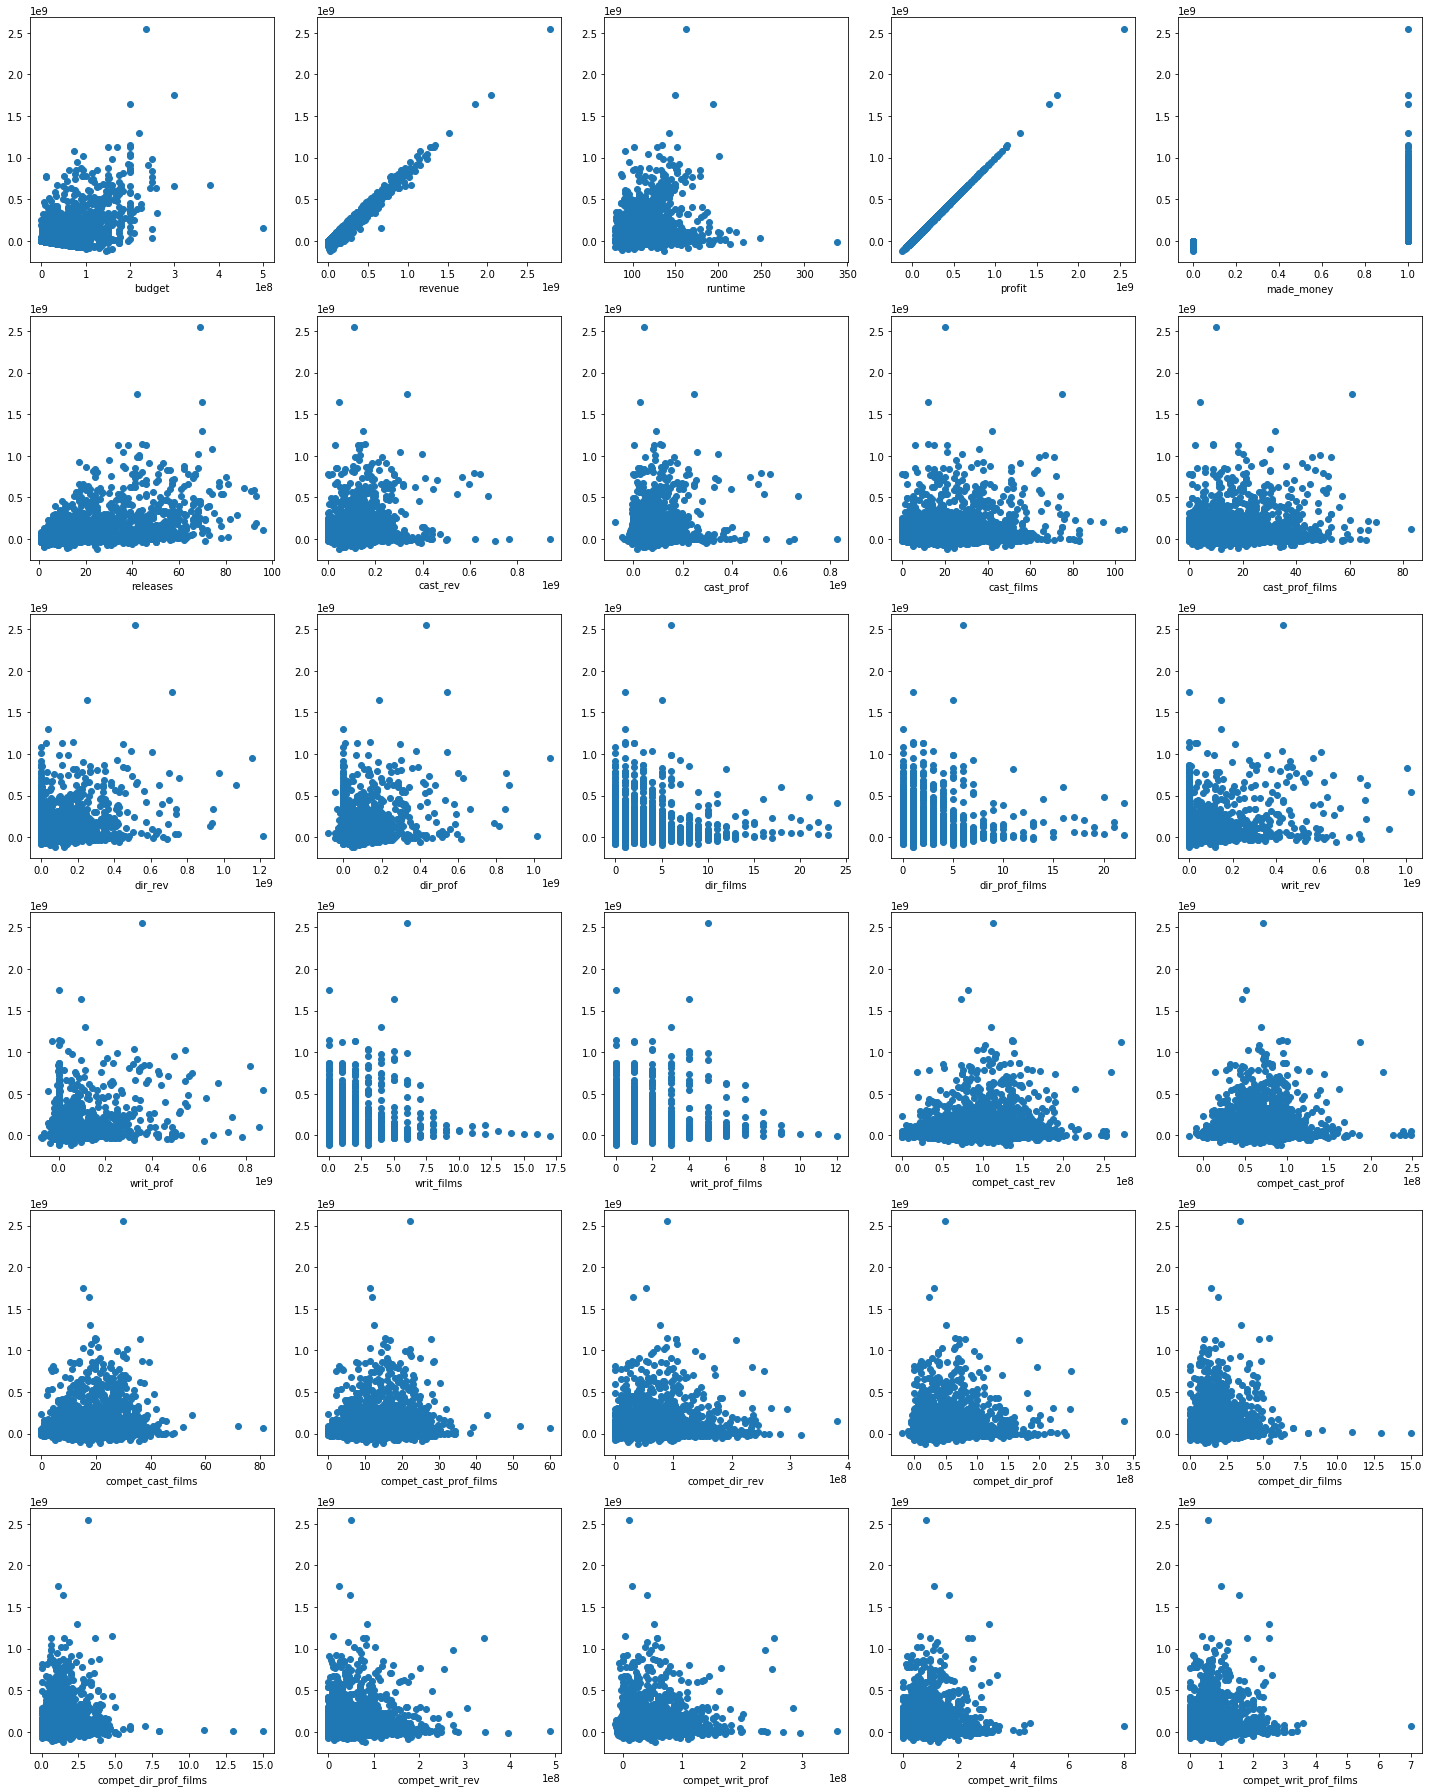

In [10]:
num_cols = ['budget', 'revenue', 'runtime', 'profit', 'made_money',
       'releases', 'cast_rev', 'cast_prof', 'cast_films', 'cast_prof_films', 'dir_rev', 'dir_prof',
       'dir_films', 'dir_prof_films', 'writ_rev', 'writ_prof', 'writ_films', 'writ_prof_films',
       'compet_cast_rev', 'compet_cast_prof', 'compet_cast_films', 'compet_cast_prof_films',
       'compet_dir_rev', 'compet_dir_prof', 'compet_dir_films', 'compet_dir_prof_films',
       'compet_writ_rev', 'compet_writ_prof', 'compet_writ_films', 'compet_writ_prof_films']

fig, axs = plt.subplots(6, 5, figsize=(20, 25))

for ax, col in zip(axs.flatten(), num_cols):
    ax.scatter(df[col], df['profit'])
    ax.set_xlabel(col)

plt.tight_layout() #can save the image below / zoom in for visibility

## Relationship btw cast avg past profits and film's profit

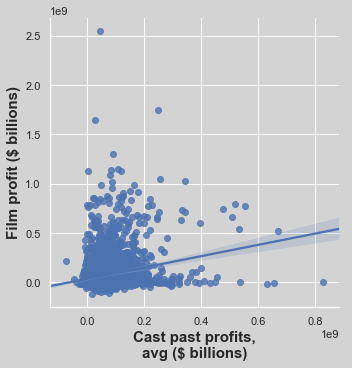

In [80]:
sns.lmplot('cast_prof', 'profit', df)

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey', 'figure.figsize':(20,20)})

xl = "Cast past profits, avg ($ billions)"
plt.xlabel('\n'.join(wrap(xl, 20)), fontweight='bold', fontsize=15)
yl = "Film profit ($ billions)"
plt.ylabel('\n'.join(wrap(yl, 50)), fontweight='bold', fontsize=15)
# plt.ylim(-100000000, 1000000000)  #toggle/adjust for zooming
# plt.xlim(-100000000, 500000000)  #toggle/adjust for zooming
plt.show()

## Relationship btw number of countries released in and film's profit

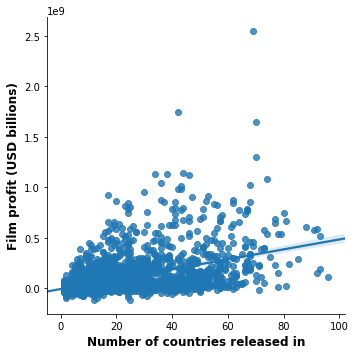

In [12]:
sns.lmplot('releases', 'profit', df)
plt.xlabel("Number of countries released in", fontweight='bold', fontsize=12)
plt.ylabel("Film profit (USD billions)", fontweight='bold', fontsize=12)
# plt.ylim(0, 5)  #toggle/adjust for zooming
# plt.xlim(0, 5)  #toggle/adjust for zooming
plt.show()

## Relationship btw budget and profit

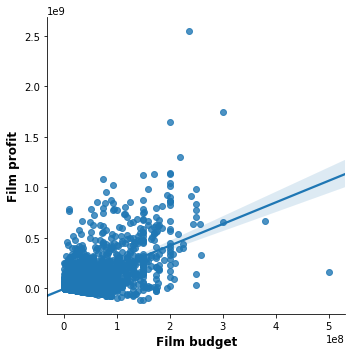

In [13]:
sns.lmplot('budget', 'profit', df)
plt.xlabel("Film budget", fontweight='bold', fontsize=12)
plt.ylabel("Film profit", fontweight='bold', fontsize=12)
# plt.ylim(0, 5)  #toggle/adjust for zooming
# plt.xlim(0, 5)  #toggle/adjust for zooming
plt.show()

#data is all over the place:

#### **How do we get a more proportional/informative measure of budget?** When is a given budget financially sound? It's important to construct an adjusted measure of budget because it doesn't make sense to say "max out your budget and you're more likely to profit". **Intuitively, one would think that the higher your ratio of cast+crew prominence/experience (e.g. as measured by their past revenue) to budget, the better your film will do, because you're theoretically getting more value for a lower price.**

#### I think we want to use avg past revenue for this purpose as opposed to avg past profit because avg past revenue minus budget  gives a sense of implied profitability, whereas it's unclear what avg past profit minus budget would imply (and it also gives us a lot of small/negative numbers). So let's check out out avg of cast and/or crew past revenue minus budget:

In [14]:
df[df['writ_rev'] == 0].count();
# most writers don't have past films in the data, so maybe won't include writers in this calc.

In [15]:
df['cast_dir_avg_rev'] = (df['cast_rev'] + df['dir_rev'])/2

In [16]:
df['adj_budget'] = df['cast_dir_avg_rev'] - df['budget']

#### **"Adjusted budget"** is defined as the average of the cast + director's average box office revenue to date, minus the budget of the current film they're part of. In theory this should give us some information about whether the film's budget makes sense considering the past success of the cast and director.

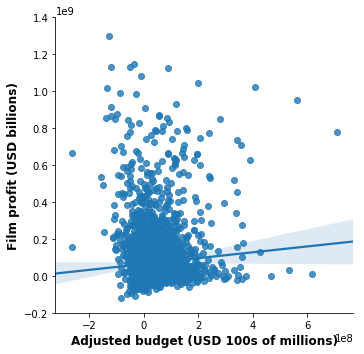

In [17]:
sns.lmplot('adj_budget', 'profit', df)
plt.xlabel("Adjusted budget (USD 100s of millions)", fontweight='bold', fontsize=12)
plt.ylabel("Film profit (USD billions)", fontweight='bold', fontsize=12)
plt.ylim(-200000000, 1400000000)  #toggle/adjust for zooming
# plt.xlim(0, 5)  #toggle/adjust for zooming
plt.show()

# data still all over the place, but trend is somewhat clearer;
# notice the difference btw the above and below in terms of the lower-most points' trajectory:

## Percentage of profitable movies by month

In [18]:
df['month'] = df['release_date'].dt.strftime('%m')

In [19]:
df_prof = df[df['made_money'] == 1]  #filtering for profitable films only

In [20]:
grouped = df_prof.groupby('month').count()

In [21]:
grouped['month'] = grouped.index
grouped_all = df.groupby('month').count()
grouped['count'] = grouped_all['id']
grouped['pct_prof'] = grouped['made_money'] / grouped['count']

#### Based on this plot & background research, it looks like there are -- roughly speaking -- four main seasons, for which I'll make dummy vars below: Jan-Apr (so-so movies), May-Jul (summer blockbusters), Aug-Oct (more so-so), and Nov-Dec (major Thanksgiving/Xmas movies)

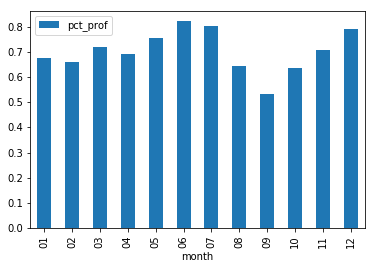

In [22]:
grouped.plot.bar(x='month', y='pct_prof')
plt.show()

## Percentage of profitable movies by genre

In [23]:
grouped2 = df_prof.groupby('genre').count()

In [24]:
grouped2['genre'] = grouped2.index
grouped_all2 = df.groupby('genre').count()
grouped2['count'] = grouped_all2['id']
grouped2['pct_prof'] = grouped2['made_money'] / grouped2['count']

#### Since it appears genre matters to profitability, will make dummy vars for genre

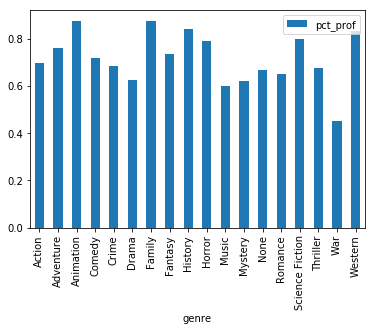

In [25]:
grouped2.plot.bar(x='genre', y='pct_prof')
plt.show()

## What decades are represented in the data?

In [26]:
df['year'] = df['release_date'].dt.strftime('%Y')

In [27]:
df = df.astype({"month": int, "year": int})

In [28]:
df['decade'] = (df['year']//10)*10

In [29]:
grouped3 = df.groupby('decade').count()

In [30]:
grouped3['decade'] = grouped3.index

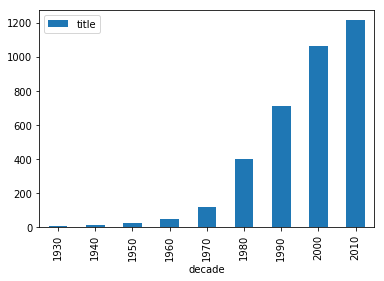

In [31]:
grouped3.plot.bar(x='decade', y='title')
plt.show()

In [32]:
df = df.astype({"decade": int})

## Relationship btw director/writer success and profitability

In [33]:
x = df['writ_prof'].values
y = df['dir_prof'].values
z = df['profit'].values

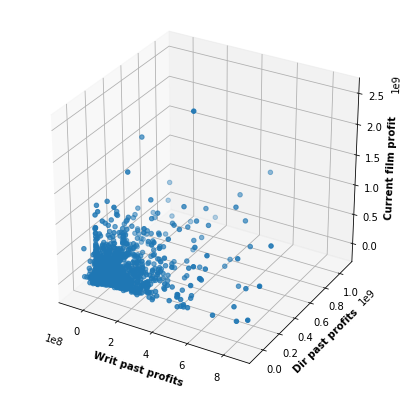

In [34]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x, ys=y, zs=z)
ax.set_xlabel('Writ past profits', fontweight='bold')
ax.set_ylabel('Dir past profits', fontweight='bold')
ax.set_zlabel('Current film profit', fontweight='bold')

plt.show()

#### Making 3d graph with best-fit plane: https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

In [35]:
data = np.column_stack((x,y,z))

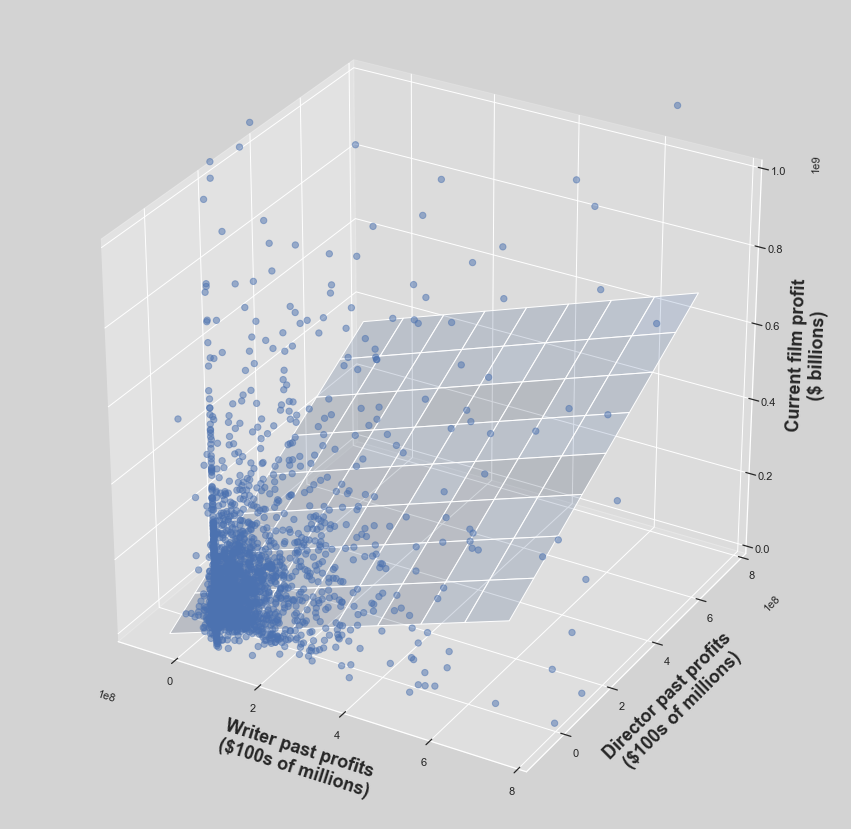

In [76]:
# regular grid covering the domain of the data
# MAKE SURE arange INTERVALS ARE NOT TOO SMALL, TAKES FOREVER TO RUN OTHERWISE

option = 2
#option 1 -- for use with full axes:
if option == 1:
    X,Y = np.meshgrid(np.arange(-74000000, 870000000, 100000000), np.arange(-79000000, 1000000000, 100000000))
#option 2 -- scaled axes:
if option == 2:
    left_lim = -70000000  # x axis limit
    right_lim = 800000000  #x axis limit
    bottom_lim = -70000000  # y axis limit
    top_lim = 800000000  #y axis limit
    z_lim = 1000000000
    X,Y = np.meshgrid(np.arange(left_lim, right_lim, 100000000), np.arange(bottom_lim, top_lim, 100000000))

XX = X.flatten()
YY = Y.flatten()

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure(figsize=(15,15), facecolor='#D3D3D3')
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)#, color=[0,1,0], cmap=cm.Wistia)
ax.scatter(data[:,0], data[:,1], data[:,2], alpha=0.5, s=40)
xl = 'Writer past profits ($100s of millions)'
ax.set_xlabel('\n'.join(wrap(xl, 22)), fontweight='bold', fontsize=18, labelpad=16)
yl = 'Director past profits ($100s of millions)'
ax.set_ylabel('\n'.join(wrap(yl, 25)), fontweight='bold', fontsize=18, labelpad=16)
zl = 'Current film profit ($ billions)'
ax.set_zlabel('\n'.join(wrap(zl, 20)), fontweight='bold', fontsize=18, labelpad=16)
ax.axis('equal')
ax.axis('tight')

# optional (see option 2 above for settings): scaling axes
ax.set_xlim(right=right_lim)
ax.set_ylim(top=top_lim)
ax.set_zlim(0, z_lim)

#option to view plot at custom angles. (30, 315) is nice
# ax.view_init(30, 315)  

#option to save fig elsewhere, get around issue of cut off axis labels
# fig.savefig("save_file_name.pdf") 

plt.show()

#also try this with scaled data, not just scaled axes

## Make dummy vars for "season" (as defined above)

In [49]:
def get_season(month):
    '''
    Function for use with pandas apply method.
    --------
    INPUT
    month: number of the release month (int, 1-12)
    --------
    OUTPUT
    new col with "season", where season is defined as
    Spring (Jan-Apr, so-so movies), 
    Summer (May-Jul, summer blockbusters),
    Fall (Aug-Oct, more so-so), and 
    Winter (Nov-Dec,major Thanksgiving/Xmas movies)
    '''
    if month >= 1 and month <= 4:
        return "spring"
    if month >= 5 and month <= 7:
        return "summer"
    if month >= 8 and month <= 10:
        return "fall"
    if month >= 11 and month <= 12:
        return "winter"

In [50]:
df['season'] = df['month'].apply(get_season)  #func in cell above

In [51]:
df = pd.concat([df, pd.get_dummies(df['season'])], axis=1)

## Make dummy vars for genre

In [52]:
df = pd.concat([df, pd.get_dummies(df['genre'])], axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 73 columns):
budget                    3600 non-null float64
id                        3600 non-null int64
release_date              3600 non-null datetime64[ns]
revenue                   3600 non-null float64
runtime                   3600 non-null float64
title                     3600 non-null object
genre                     3600 non-null object
profit                    3600 non-null float64
made_money                3600 non-null int64
cast_0                    3600 non-null object
cast_1                    3600 non-null object
cast_2                    3600 non-null object
cast_3                    3600 non-null object
cast_4                    3600 non-null object
director                  3600 non-null object
writer                    3600 non-null object
releases                  3600 non-null int64
cast_rev                  3600 non-null float64
cast_prof                 3600 non-nu

## Saving this new iteration of the data to csv

#### Check that data types are ok and make any needed conversions:

In [54]:
os.getcwd()

'/Users/ryanrappa/Desktop/dsi/film-profit-prediction/jupyter_notebooks'

In [315]:
# df.to_csv(path_or_buf='/Users/ryanrappa/Desktop/dsi/film-profit-prediction/csv_files/clean_data_v2.csv')

### Next step: trying out different models (see next jupyter notebook)...

#### ...don't forget data imbalanced

In [55]:
2525/3600  #number of profitable films/all films

0.7013888888888888

### --- sandbox ---

#### rel btw competing films' cast and profit, then film's cast and profit

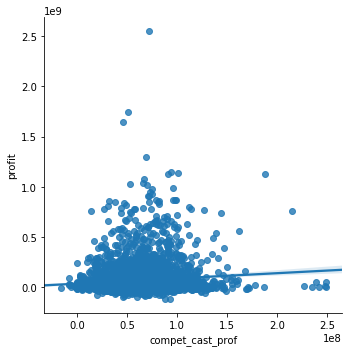

In [316]:
sns.lmplot('compet_cast_prof', 'profit', df)#, col='family_income_cat')#, col_wrap=2)
# plt.ylim(0, 5)
plt.show()

## looks like random (and is pretty much the same when plotting compet. dir/writer):

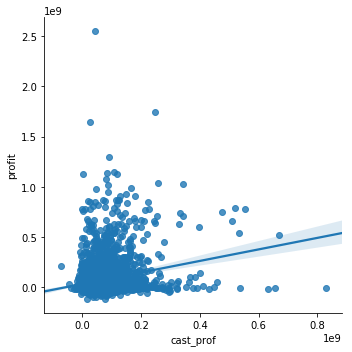

In [317]:
sns.lmplot('cast_prof', 'profit', df)
# plt.ylim(0, 5)
plt.show()

#something realer looking here:

#### rel btw compet. writ. and dir. and profit

In [318]:
a = df['compet_writ_prof'].values
b = df['compet_dir_prof'].values
c = df['profit'].values

In [319]:
data2 = np.column_stack((a,b,c))

In [320]:
def three_d_plot(data):    
    %matplotlib inline
    # %matplotlib qt

    # regular grid covering the domain of the data
    # MAKE SURE arange INTERVALS ARE NOT TOO SMALL, TAKES FOREVER TO RUN OTHERWISE

    option = 2
    #option 1 -- for use with full axes:
    if option == 1:
        X,Y = np.meshgrid(np.arange(-83372628, 2649903959, 100000000), np.arange(-79627709, 6490889213, 100000000))
    #option 2 -- scaled axes:
    if option == 2:
        right_lim = 1000000000  #x axis limit
        top_lim = 3000000000  #y axis limit
        z_lim = 1000000000
        X,Y = np.meshgrid(np.arange(-83372628, right_lim, 100000000), np.arange(-79627709, top_lim, 100000000))

    XX = X.flatten()
    YY = Y.flatten()

    order = 1    # 1: linear, 2: quadratic
    if order == 1:
        # best-fit linear plane
        A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
        C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients

        # evaluate it on grid
        Z = C[0]*X + C[1]*Y + C[2]

        # or expressed using matrix/vector product
        #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

    elif order == 2:
        # best-fit quadratic curve
        A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
        C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])

        # evaluate it on a grid
        Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

    # plot points and fitted surface
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)#, color=[0,1,0], cmap=cm.Wistia)
    ax.scatter(data[:,0], data[:,1], data[:,2], alpha=0.5, s=40)
    ax.set_xlabel('Writ past profits', fontweight='bold')
    ax.set_ylabel('Dir past profits', fontweight='bold')
    ax.set_zlabel('Current film profit', fontweight='bold')
    ax.axis('equal')
    ax.axis('tight')

    # optional (see option 2 above for settings): scaling axes
    ax.set_xlim(right=right_lim)
    ax.set_ylim(top=top_lim)
    ax.set_zlim(0, z_lim)

    ax.view_init(30, 330)  #option to view the plot at custom angles 

    plt.show()

    #also try this with scaled data, not just scaled axes

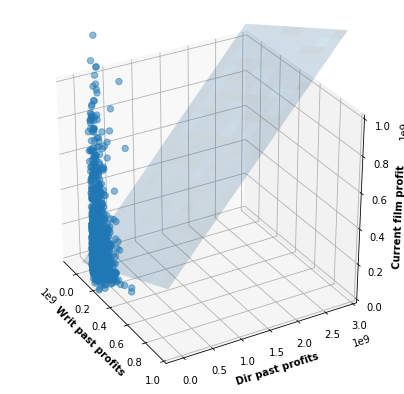

In [321]:
three_d_plot(data2)

# looks like randomness: